# Online Food Ordering App Data Analysis

In [35]:
#All imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sb
import statsmodels.formula.api as sfa

%matplotlib inline

In [36]:
#importing data of all restaurant enrolled in App
restaurant_dtls = pd.read_excel('dataset/restaurant_detail.xls', 
                                index_col=0, converter= {'Currency':str}).sample(
    9550, random_state = 44)
#printing dataframe having all column present in excel
restaurant_dtls.head()

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost For Two,Currency,Has Table Booking,Has Online Delivery,Is Delivering Now,Switch To Order Menu,Price Range,Aggregate Rating,Rating Color,Rating Text,Votes
Restaurant ID,,,,,,,,,,,,,,,,,,
18483714,Fratini La Trattoria,184,Singapore,"Hillcrest, Bukit Timah",103.807081,1.331128,Italian,100,Dollar($),No,No,No,No,4,4.1,Green,Very Good,35
5602055,Rajasthan Al Malaki,214,Sharjah,Muwailih Commercial,55.451955,25.288772,"Indian, North Indian",60,Emirati Diram(AED),No,No,No,No,3,4.8,Dark Green,Excellent,459
18361580,Pao King,1,Gurgaon,DLF Phase 2,77.082614,28.484096,Street Food,200,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
18082089,Zaika Mughlai Foods,1,New Delhi,Chandni Chowk,77.223361,28.656638,"Mughlai, Biryani",550,Indian Rupees(Rs.),No,No,No,No,2,3.3,Orange,Average,10
17621780,HuHot Mongolian Grill,216,Sioux City,Sioux City,-96.347900,42.439100,"Asian, Chinese",25,Dollar($),No,No,No,No,2,3.6,Yellow,Good,94


In [37]:
#importing country mapping data for country code
use_cols = ['Country Code', 'Country']
country_dtls = pd.read_excel('dataset/country_code.xlsx', usecols = use_cols)
#printing country dataframe imported
country_dtls

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [38]:
#Merging dataframes to get country name by joining on country code
main_data = pd.merge(restaurant_dtls, country_dtls, on='Country Code', how='inner')
#printing dataframe
main_data

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost For Two,Currency,Has Table Booking,Has Online Delivery,Is Delivering Now,Switch To Order Menu,Price Range,Aggregate Rating,Rating Color,Rating Text,Votes,Country
0,Fratini La Trattoria,184,Singapore,"Hillcrest, Bukit Timah",103.807081,1.331128,Italian,100,Dollar($),No,No,No,No,4,4.1,Green,Very Good,35,Singapore
1,Jaan,184,Singapore,"City Hall, Downtown Core",103.853605,1.293221,French,430,Dollar($),No,No,No,No,4,3.8,Yellow,Good,35,Singapore
2,The Lokal,184,Singapore,"Neil Road, Outram",103.840921,1.278373,"Singaporean, Australian, German",60,Dollar($),No,No,No,No,4,3.1,Orange,Average,33,Singapore
3,Artichoke Cafe,184,Singapore,"Victoria, Rochor",103.851994,1.299708,"Cafe, Spanish, Turkish, Greek",75,Dollar($),No,No,No,No,4,3.2,Orange,Average,33,Singapore
4,Chye Seng Huat Hardware,184,Singapore,"Lavender, Kallang",103.860416,1.311551,Cafe,40,Dollar($),No,No,No,No,3,3.7,Yellow,Good,33,Singapore
5,Summer Pavilion,184,Singapore,"Marina Centre, Downtown Core",103.860177,1.290801,"Chinese, Seafood, Cantonese, Dim Sum",300,Dollar($),No,No,No,No,4,3.9,Yellow,Good,34,Singapore
6,Sky On 57,184,Singapore,"Bayfront Avenue, Downtown Core",103.860005,1.282661,"Chinese, Continental, Singaporean",300,Dollar($),No,No,No,No,4,3.4,Orange,Average,34,Singapore
7,Cut By Wolfgang Puck,184,Singapore,"Bayfront Subzone, Downtown Core",103.859422,1.285477,"American, Steak",270,Dollar($),No,No,No,No,4,4.0,Green,Very Good,33,Singapore
8,Bitters & Love,184,Singapore,"Telok Ayer Street, Outram",103.848254,1.281970,Finger Food,40,Dollar($),No,No,No,No,3,3.9,Yellow,Good,35,Singapore
9,The Refinery Singapore,184,Singapore,"Lavender, Kallang",103.862120,1.310668,"American, Japanese, Singaporean",80,Dollar($),No,No,No,No,4,3.2,Orange,Average,30,Singapore


In [39]:
main_data['Currency'].unique()

array(['Dollar($)', 'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Botswana Pula(P)', 'Brazilian Real(R$)', 'NewZealand($)',
       'Pounds(\x8c£)', 'Rand(R)', 'Indonesian Rupiah(IDR)',
       'Sri Lankan Rupee(LKR)', 'Turkish Lira(TL)', 'Qatari Rial(QR)'],
      dtype=object)

In [40]:
count_rest_curr_wise = main_data.groupby(['Currency'])['Restaurant Name'].count()
count_rest_curr_wise

Currency
Botswana Pula(P)            22
Brazilian Real(R$)          60
Dollar($)                  482
Emirati Diram(AED)          60
Indian Rupees(Rs.)        8651
Indonesian Rupiah(IDR)      21
NewZealand($)               40
Pounds(£)                  80
Qatari Rial(QR)             20
Rand(R)                     60
Sri Lankan Rupee(LKR)       20
Turkish Lira(TL)            34
Name: Restaurant Name, dtype: int64

In [41]:
curr_per_country = main_data.groupby(['Currency'])['Country'].nunique()
curr_per_country

Currency
Botswana Pula(P)          1
Brazilian Real(R$)        1
Dollar($)                 4
Emirati Diram(AED)        1
Indian Rupees(Rs.)        1
Indonesian Rupiah(IDR)    1
NewZealand($)             1
Pounds(£)                1
Qatari Rial(QR)           1
Rand(R)                   1
Sri Lankan Rupee(LKR)     1
Turkish Lira(TL)          1
Name: Country, dtype: int64

In [42]:
main_data.dtypes

Restaurant Name          object
Country Code              int64
City                     object
Locality                 object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost For Two      int64
Currency                 object
Has Table Booking        object
Has Online Delivery      object
Is Delivering Now        object
Switch To Order Menu     object
Price Range               int64
Aggregate Rating        float64
Rating Color             object
Rating Text              object
Votes                     int64
Country                  object
dtype: object

In [43]:
main_data['Currency'] = main_data['Currency'].str.split('(').str[0]
main_data.head()

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost For Two,Currency,Has Table Booking,Has Online Delivery,Is Delivering Now,Switch To Order Menu,Price Range,Aggregate Rating,Rating Color,Rating Text,Votes,Country
0,Fratini La Trattoria,184,Singapore,"Hillcrest, Bukit Timah",103.807081,1.331128,Italian,100,Dollar,No,No,No,No,4,4.1,Green,Very Good,35,Singapore
1,Jaan,184,Singapore,"City Hall, Downtown Core",103.853605,1.293221,French,430,Dollar,No,No,No,No,4,3.8,Yellow,Good,35,Singapore
2,The Lokal,184,Singapore,"Neil Road, Outram",103.840921,1.278373,"Singaporean, Australian, German",60,Dollar,No,No,No,No,4,3.1,Orange,Average,33,Singapore
3,Artichoke Cafe,184,Singapore,"Victoria, Rochor",103.851994,1.299708,"Cafe, Spanish, Turkish, Greek",75,Dollar,No,No,No,No,4,3.2,Orange,Average,33,Singapore
4,Chye Seng Huat Hardware,184,Singapore,"Lavender, Kallang",103.860416,1.311551,Cafe,40,Dollar,No,No,No,No,3,3.7,Yellow,Good,33,Singapore


In [44]:
main_data['Currency'].unique()

array(['Dollar', 'Emirati Diram', 'Indian Rupees', 'Botswana Pula',
       'Brazilian Real', 'NewZealand', 'Pounds', 'Rand',
       'Indonesian Rupiah', 'Sri Lankan Rupee', 'Turkish Lira',
       'Qatari Rial'], dtype=object)

In [45]:
Currency = ['Dollar', 'Emirati Diram', 'Indian Rupees', 'Botswana Pula',
       'Brazilian Real', 'NewZealand', 'Pounds', 'Rand',
       'Indonesian Rupiah', 'Sri Lankan Rupee', 'Turkish Lira',
       'Qatari Rial']
Dollar_Rate = [1, 0.27, 0.014, 0.091, 0.25, 0.64, 1.22, 0.065, 0.000070, 0.0056, 0.18,0.27]
currency_df = pd.DataFrame(list(zip(Currency, Dollar_Rate)), 
                           columns=['Currency', 'Dollar_Rate'])
currency_df

,Currency,Dollar_Rate
0,Dollar,1.00000
1,Emirati Diram,0.27000
2,Indian Rupees,0.01400
3,Botswana Pula,0.09100
4,Brazilian Real,0.25000
5,NewZealand,0.64000
6,Pounds,1.22000
7,Rand,0.06500
8,Indonesian Rupiah,0.00007
9,Sri Lankan Rupee,0.00560


In [46]:
main_data = pd.merge(main_data, currency_df, on='Currency', how='inner')
main_data.head()

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost For Two,Currency,Has Table Booking,Has Online Delivery,Is Delivering Now,Switch To Order Menu,Price Range,Aggregate Rating,Rating Color,Rating Text,Votes,Country,Dollar_Rate
0,Fratini La Trattoria,184,Singapore,"Hillcrest, Bukit Timah",103.807081,1.331128,Italian,100,Dollar,No,No,No,No,4,4.1,Green,Very Good,35,Singapore,1.0
1,Jaan,184,Singapore,"City Hall, Downtown Core",103.853605,1.293221,French,430,Dollar,No,No,No,No,4,3.8,Yellow,Good,35,Singapore,1.0
2,The Lokal,184,Singapore,"Neil Road, Outram",103.840921,1.278373,"Singaporean, Australian, German",60,Dollar,No,No,No,No,4,3.1,Orange,Average,33,Singapore,1.0
3,Artichoke Cafe,184,Singapore,"Victoria, Rochor",103.851994,1.299708,"Cafe, Spanish, Turkish, Greek",75,Dollar,No,No,No,No,4,3.2,Orange,Average,33,Singapore,1.0
4,Chye Seng Huat Hardware,184,Singapore,"Lavender, Kallang",103.860416,1.311551,Cafe,40,Dollar,No,No,No,No,3,3.7,Yellow,Good,33,Singapore,1.0


In [47]:
main_data['Average Cost For Two'] *= main_data['Dollar_Rate']
main_data['Currency'] = 'Dollar'
main_data

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost For Two,Currency,Has Table Booking,Has Online Delivery,Is Delivering Now,Switch To Order Menu,Price Range,Aggregate Rating,Rating Color,Rating Text,Votes,Country,Dollar_Rate
0,Fratini La Trattoria,184,Singapore,"Hillcrest, Bukit Timah",103.807081,1.331128,Italian,100.00,Dollar,No,No,No,No,4,4.1,Green,Very Good,35,Singapore,1.00
1,Jaan,184,Singapore,"City Hall, Downtown Core",103.853605,1.293221,French,430.00,Dollar,No,No,No,No,4,3.8,Yellow,Good,35,Singapore,1.00
2,The Lokal,184,Singapore,"Neil Road, Outram",103.840921,1.278373,"Singaporean, Australian, German",60.00,Dollar,No,No,No,No,4,3.1,Orange,Average,33,Singapore,1.00
3,Artichoke Cafe,184,Singapore,"Victoria, Rochor",103.851994,1.299708,"Cafe, Spanish, Turkish, Greek",75.00,Dollar,No,No,No,No,4,3.2,Orange,Average,33,Singapore,1.00
4,Chye Seng Huat Hardware,184,Singapore,"Lavender, Kallang",103.860416,1.311551,Cafe,40.00,Dollar,No,No,No,No,3,3.7,Yellow,Good,33,Singapore,1.00
5,Summer Pavilion,184,Singapore,"Marina Centre, Downtown Core",103.860177,1.290801,"Chinese, Seafood, Cantonese, Dim Sum",300.00,Dollar,No,No,No,No,4,3.9,Yellow,Good,34,Singapore,1.00
6,Sky On 57,184,Singapore,"Bayfront Avenue, Downtown Core",103.860005,1.282661,"Chinese, Continental, Singaporean",300.00,Dollar,No,No,No,No,4,3.4,Orange,Average,34,Singapore,1.00
7,Cut By Wolfgang Puck,184,Singapore,"Bayfront Subzone, Downtown Core",103.859422,1.285477,"American, Steak",270.00,Dollar,No,No,No,No,4,4.0,Green,Very Good,33,Singapore,1.00
8,Bitters & Love,184,Singapore,"Telok Ayer Street, Outram",103.848254,1.281970,Finger Food,40.00,Dollar,No,No,No,No,3,3.9,Yellow,Good,35,Singapore,1.00
9,The Refinery Singapore,184,Singapore,"Lavender, Kallang",103.862120,1.310668,"American, Japanese, Singaporean",80.00,Dollar,No,No,No,No,4,3.2,Orange,Average,30,Singapore,1.00


In [48]:
#Describe function perform all statistic operations on all numerical columns present 
#in dataframe 
main_data.describe()

,Country Code,Longitude,Latitude,Average Cost For Two,Price Range,Aggregate Rating,Votes,Dollar_Rate
count,9550.000000,9550.000000,9550.000000,9550.000000,9550.000000,9550.000000,9550.000000,9550.000000
mean,18.367435,64.125201,25.854098,11.425902,1.804817,2.666649,156.925969,0.081157
std,56.753239,41.469012,11.008477,17.992190,0.905654,1.516211,430.188748,0.243756
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000,0.000070
25%,1.000000,77.081329,28.478698,4.200000,1.000000,2.500000,5.000000,0.014000
50%,1.000000,77.191960,28.570470,7.000000,2.000000,3.200000,31.000000,0.014000
75%,1.000000,77.282012,28.642760,11.200000,2.000000,3.700000,131.000000,0.014000
max,216.000000,174.832089,55.976980,546.000000,4.000000,4.900000,10934.000000,1.220000


Text(0, 0.5, 'Count of Restaurant')

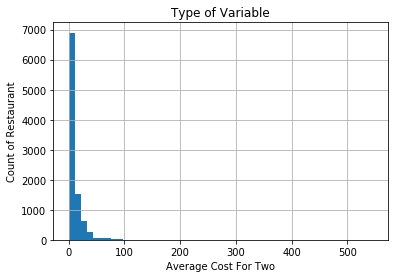

In [49]:
fig = main_data['Average Cost For Two'].hist(bins=50)
fig.set_title('Type of Variable')
fig.set_xlabel('Average Cost For Two')
fig.set_ylabel('Count of Restaurant')

Text(0, 0.5, 'Count of Restaurant')

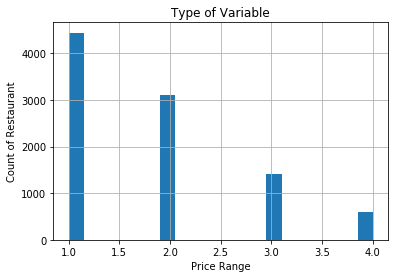

In [50]:
fig = main_data['Price Range'].hist(bins=20)
fig.set_title('Type of Variable')
fig.set_xlabel('Price Range')
fig.set_ylabel('Count of Restaurant')

In [51]:
#Counting number of resturant present in a country
country_restaurant = main_data['Country'].value_counts()
#Coverting the series into dataframe that we got in above line of code and naming the 
#numerical column we got after applying value_counts function
country_restaurant_df = country_restaurant.to_frame(name='Count of Restaurant')
country_restaurant_df

,Count of Restaurant
India,8651
United States,434
United Kingdom,80
Brazil,60
UAE,60
South Africa,60
New Zealand,40
Turkey,34
Australia,24
Phillipines,22


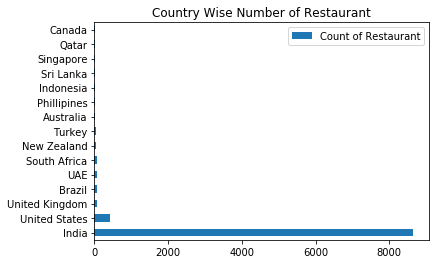

In [52]:
#Bar plot for country wise number of restaurant
country_restaurant_df.plot(kind='barh', 
                        title='Country Wise Number of Restaurant', legend='True')

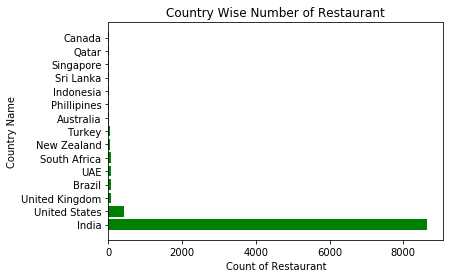

In [53]:
#Bar plot for country wise number of restaurant
#plt.figure(figsize=(16,4))
plt.barh(country_restaurant_df.index, country_restaurant_df['Count of Restaurant'], color="g")
plt.ylabel("Country Name")
plt.xlabel("Count of Restaurant")
plt.title("Country Wise Number of Restaurant")
plt.show()

In [54]:
#Counting number of restaurant falling under same rating
rating_restaurant = main_data['Rating Text'].value_counts()
#Coverting the series into dataframe that we got in above line of code and naming the 
#numerical column we got after applying value_counts function
rating_restaurant_df = rating_restaurant.to_frame(name ='Count of Rating')
rating_restaurant_df

,Count of Rating
Average,3737
Not rated,2147
Good,2100
Very Good,1079
Excellent,301
Poor,186


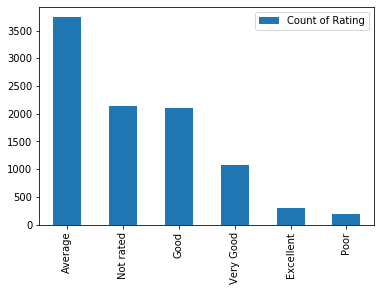

In [55]:
#Bar plot for number of restaurant falling under same rating
rating_restaurant_df.plot(kind="bar", legend='True')

In [56]:
#taking country and rating text column from main dataframe to do analysis
rating_country_restaurant = main_data[['Country','Rating Text']]
rating_country_restaurant.head()

,Country,Rating Text
0,Singapore,Very Good
1,Singapore,Good
2,Singapore,Average
3,Singapore,Average
4,Singapore,Good


In [57]:
#performing groupby on rating text for getting name of country coming under same rating
country_groupby_rating = rating_country_restaurant.groupby('Rating Text')
country_groupby_rating
for name, group in country_groupby_rating:
    print(name)
    print(group)

Average
             Country Rating Text
2          Singapore     Average
3          Singapore     Average
6          Singapore     Average
9          Singapore     Average
11         Singapore     Average
12         Singapore     Average
14         Singapore     Average
15         Singapore     Average
17         Singapore     Average
50     United States     Average
118    United States     Average
127    United States     Average
135    United States     Average
142    United States     Average
146    United States     Average
169    United States     Average
181    United States     Average
189    United States     Average
213    United States     Average
214    United States     Average
218    United States     Average
225    United States     Average
229    United States     Average
244    United States     Average
251    United States     Average
284    United States     Average
288    United States     Average
338    United States     Average
345    United States     Average
40

In [58]:
#printing the country name which are having average rating text
print(country_groupby_rating.get_group('Average'))

             Country Rating Text
2          Singapore     Average
3          Singapore     Average
6          Singapore     Average
9          Singapore     Average
11         Singapore     Average
12         Singapore     Average
14         Singapore     Average
15         Singapore     Average
17         Singapore     Average
50     United States     Average
118    United States     Average
127    United States     Average
135    United States     Average
142    United States     Average
146    United States     Average
169    United States     Average
181    United States     Average
189    United States     Average
213    United States     Average
214    United States     Average
218    United States     Average
225    United States     Average
229    United States     Average
244    United States     Average
251    United States     Average
284    United States     Average
288    United States     Average
338    United States     Average
345    United States     Average
401    Uni

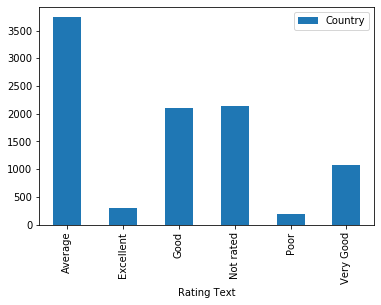

In [59]:
#Bar plot for number of restaurant falling under same rating
country_groupby_rating.agg(np.size).plot(kind="bar")

In [60]:
country_groupby_rating.agg(np.size)

,Country
Rating Text,
Average,3737
Excellent,301
Good,2100
Not rated,2147
Poor,186
Very Good,1079


In [61]:
rating_country_restaurant.groupby('Country').first()

,Rating Text
Country,
Australia,Very Good
Brazil,Very Good
Canada,Good
India,Not rated
Indonesia,Very Good
New Zealand,Excellent
Phillipines,Very Good
Qatar,Very Good
Singapore,Very Good


In [62]:
#Applying groupby over country and rating text to get country and rating wise number of restaurant
rating_country_restaurant_df = rating_country_restaurant.groupby(['Country','Rating Text']).size().to_frame(name='Count of Restaurant')
rating_country_restaurant_df

Count of Restaurant
Country        Rating Text                     
Australia      Average                        4
               Excellent                      1
               Good                          13
               Poor                           1
               Very Good                      5
Brazil         Average                        8
               Excellent                     16
               Good                          11
               Not rated                      5
               Very Good                     20
Canada         Average                        2
               Good                           1
               Very Good                      1
India          Average                     3678
               Excellent                    116
               Good                        1847
               Not rated                   2138
               Poor                         180
               Very Good                    692
Indonesia      Average                        1
               Excellent                      7
               Good                           3
               Very Good                     10
New Zealand    Excellent                     12
               Good                           2
               Poor                           1
               Very Good                     25
Phillipines    Excellent                     12
               Good                           1
               Very Good                      9
...                                         ...
Singapore      Very Good                      3
South Africa   Average                        1
               Excellent                     12
               Good                          12
               Very Good                     35
Sri Lanka      Average                        2
               Excellent                      2
               Good                           4
               Poor                           1
               Very Good                     11
Turkey         Average                        1
               Excellent                     10
               Good                           3
               Very Good                     20
UAE            Average                        1
               Excellent                     18
               Good                           9
               Poor                           1
               Very Good                     31
United Kingdom Average                        5
               Excellent                     23
               Good                          20
               Not rated                      1
               Very Good                     31
United States  Average                       23
               Excellent                     68
               Good                         159
               Not rated                      3
               Poor                           2
               Very Good                    179

[66 rows x 1 columns]

In [63]:
#unstacking the series with multiindex on second column i.e, rating text 
#obtained from previous code
rating_country_restaurant_df.unstack(level=1)

Count of Restaurant                                     \
Rating Text                Average Excellent    Good Not rated   Poor   
Country                                                                 
Australia                      4.0       1.0    13.0       NaN    1.0   
Brazil                         8.0      16.0    11.0       5.0    NaN   
Canada                         2.0       NaN     1.0       NaN    NaN   
India                       3678.0     116.0  1847.0    2138.0  180.0   
Indonesia                      1.0       7.0     3.0       NaN    NaN   
New Zealand                    NaN      12.0     2.0       NaN    1.0   
Phillipines                    NaN      12.0     1.0       NaN    NaN   
Qatar                          2.0       4.0     7.0       NaN    NaN   
Singapore                      9.0       NaN     8.0       NaN    NaN   
South Africa                   1.0      12.0    12.0       NaN    NaN   
Sri Lanka                      2.0       2.0     4.0       NaN    1.0   
Turkey                         1.0      10.0     3.0       NaN    NaN   
UAE                            1.0      18.0     9.0       NaN    1.0   
United Kingdom                 5.0      23.0    20.0       1.0    NaN   
United States                 23.0      68.0   159.0       3.0    2.0   

                          
Rating Text    Very Good  
Country                   
Australia            5.0  
Brazil              20.0  
Canada               1.0  
India              692.0  
Indonesia           10.0  
New Zealand         25.0  
Phillipines          9.0  
Qatar                7.0  
Singapore            3.0  
South Africa        35.0  
Sri Lanka           11.0  
Turkey              20.0  
UAE                 31.0  
United Kingdom      31.0  
United States      179.0

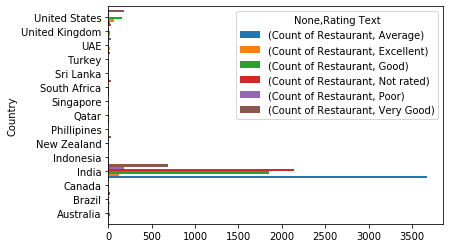

In [64]:
#Bar plot showing 
rating_country_restaurant_df.unstack(level=1).plot(kind='barh', width=1)

In [65]:
main_data.head()

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost For Two,Currency,Has Table Booking,Has Online Delivery,Is Delivering Now,Switch To Order Menu,Price Range,Aggregate Rating,Rating Color,Rating Text,Votes,Country,Dollar_Rate
0,Fratini La Trattoria,184,Singapore,"Hillcrest, Bukit Timah",103.807081,1.331128,Italian,100.0,Dollar,No,No,No,No,4,4.1,Green,Very Good,35,Singapore,1.0
1,Jaan,184,Singapore,"City Hall, Downtown Core",103.853605,1.293221,French,430.0,Dollar,No,No,No,No,4,3.8,Yellow,Good,35,Singapore,1.0
2,The Lokal,184,Singapore,"Neil Road, Outram",103.840921,1.278373,"Singaporean, Australian, German",60.0,Dollar,No,No,No,No,4,3.1,Orange,Average,33,Singapore,1.0
3,Artichoke Cafe,184,Singapore,"Victoria, Rochor",103.851994,1.299708,"Cafe, Spanish, Turkish, Greek",75.0,Dollar,No,No,No,No,4,3.2,Orange,Average,33,Singapore,1.0
4,Chye Seng Huat Hardware,184,Singapore,"Lavender, Kallang",103.860416,1.311551,Cafe,40.0,Dollar,No,No,No,No,3,3.7,Yellow,Good,33,Singapore,1.0


In [72]:
main_data = main_data.drop(labels = ['Currency', 'Country Code', 'Locality', 'Longitude',
                                     'Latitude', 'Dollar_Rate', 'Is Delivering Now',
                                     'Switch To Order Menu'], errors = 'raise', axis=1)
main_data.head()

,Restaurant Name,City,Cuisines,Average Cost For Two,Has Table Booking,Has Online Delivery,Price Range,Aggregate Rating,Rating Color,Rating Text,Votes,Country
0,Fratini La Trattoria,Singapore,Italian,100.0,No,No,4,4.1,Green,Very Good,35,Singapore
1,Jaan,Singapore,French,430.0,No,No,4,3.8,Yellow,Good,35,Singapore
2,The Lokal,Singapore,"Singaporean, Australian, German",60.0,No,No,4,3.1,Orange,Average,33,Singapore
3,Artichoke Cafe,Singapore,"Cafe, Spanish, Turkish, Greek",75.0,No,No,4,3.2,Orange,Average,33,Singapore
4,Chye Seng Huat Hardware,Singapore,Cafe,40.0,No,No,3,3.7,Yellow,Good,33,Singapore


In [73]:
main_data['Has Table Booking'] = main_data['Has Table Booking'].map({'No':0, 'Yes':1})
main_data['Has Online Delivery'] = main_data['Has Online Delivery'].map({'No':0, 'Yes':1})
main_data.head()

,Restaurant Name,City,Cuisines,Average Cost For Two,Has Table Booking,Has Online Delivery,Price Range,Aggregate Rating,Rating Color,Rating Text,Votes,Country
0,Fratini La Trattoria,Singapore,Italian,100.0,0,0,4,4.1,Green,Very Good,35,Singapore
1,Jaan,Singapore,French,430.0,0,0,4,3.8,Yellow,Good,35,Singapore
2,The Lokal,Singapore,"Singaporean, Australian, German",60.0,0,0,4,3.1,Orange,Average,33,Singapore
3,Artichoke Cafe,Singapore,"Cafe, Spanish, Turkish, Greek",75.0,0,0,4,3.2,Orange,Average,33,Singapore
4,Chye Seng Huat Hardware,Singapore,Cafe,40.0,0,0,3,3.7,Yellow,Good,33,Singapore


In [81]:
np.random.seed(12345)
ran_sales = np.random.rand(len(main_data))*1000
ran_sales

array([929.61609282, 316.37555458, 183.91881168, ..., 779.72462499,
       451.828738  , 296.95535382])

In [89]:
main_data['Avg_Sale_Day'] = [int(i) for i in ran_sales]
main_data.head()
#main_data = main_data.drop(labels = ['Avg_Expend_One_People'], axis=1)

,Restaurant Name,City,Cuisines,Average Cost For Two,Has Table Booking,Has Online Delivery,Price Range,Aggregate Rating,Rating Color,Rating Text,Votes,Country,Avg_Sale_Day
0,Fratini La Trattoria,Singapore,Italian,100.0,0,0,4,4.1,Green,Very Good,35,Singapore,929
1,Jaan,Singapore,French,430.0,0,0,4,3.8,Yellow,Good,35,Singapore,316
2,The Lokal,Singapore,"Singaporean, Australian, German",60.0,0,0,4,3.1,Orange,Average,33,Singapore,183
3,Artichoke Cafe,Singapore,"Cafe, Spanish, Turkish, Greek",75.0,0,0,4,3.2,Orange,Average,33,Singapore,204
4,Chye Seng Huat Hardware,Singapore,Cafe,40.0,0,0,3,3.7,Yellow,Good,33,Singapore,567


In [95]:
from sklearn.linear_model import LinearRegression
features_col = ['Average Cost For Two', 'Has Table Booking', 'Has Online Delivery',
            'Price Range', 'Aggregate Rating', 'Votes']
X = main_data[features_col]
Y = main_data['Avg_Sale_Day']

lin_mod1 = LinearRegression()
lin_mod1.fit(X, Y)

print(lin_mod1.intercept_)
print(lin_mod1.coef_)

for i in zip(features_col, lin_mod1.coef_):
    print(i)

498.74876276420775
[-1.52336906e-01 -9.35417718e+00 -5.22975839e+00  9.36599050e+00
 -3.48162580e+00  4.05718921e-05]
('Average Cost For Two', -0.1523369061427855)
('Has Table Booking', -9.354177182097825)
('Has Online Delivery', -5.229758388190196)
('Price Range', 9.365990500262276)
('Aggregate Rating', -3.48162579968119)
('Votes', 4.057189208409213e-05)


In [106]:
features_col2 = ['Price Range']
X = main_data[features_col2]
Y = main_data['Avg_Sale_Day']

lin_mod2 = LinearRegression()
lin_mod2.fit(X, Y)

print(lin_mod2.intercept_)

for i in zip(features_col2, lin_mod2.coef_):
    print(i)

496.4956630522405
('Price Range', 3.1371790352229705)


In [110]:
lin_mod2.predict([[4]])

array([509.04437919])